In [95]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

## Task 1

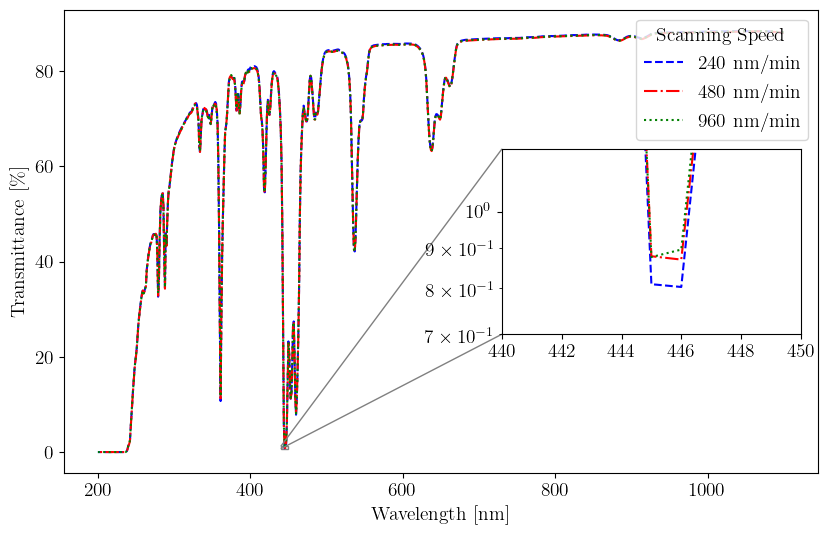

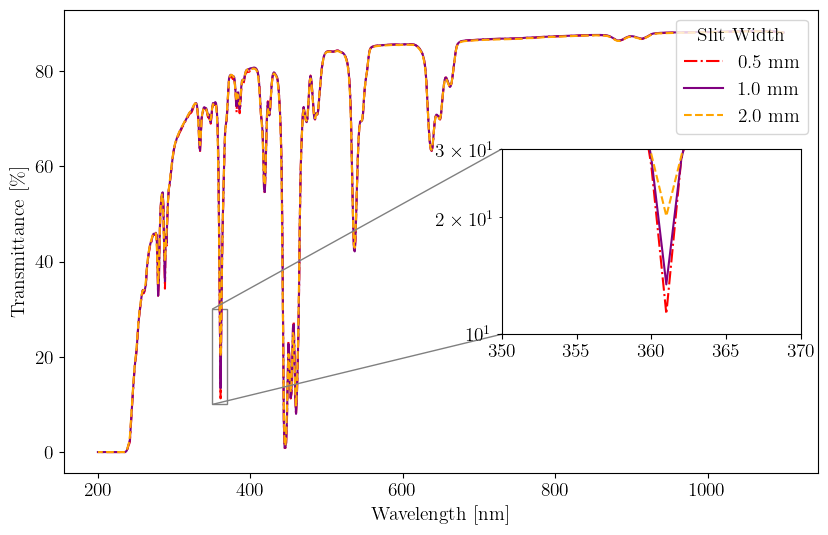

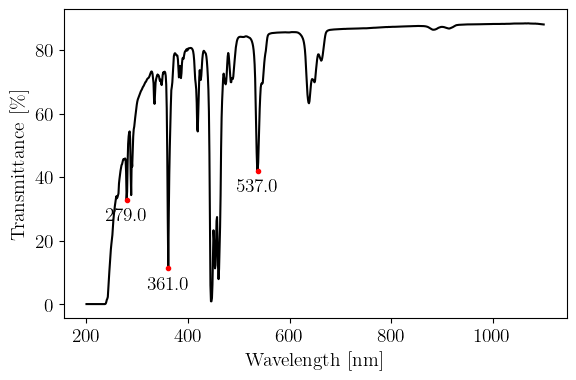

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 1')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

# Initialize the list of data for files with 05 in the file name
data_05 = []

# Initialize the list of data for files with 480 in the file name
data_480 = []

# Loop through the data
for file_name, file_data in data:
    # Check if the file name contains 05
    if '05' in file_name:
        # Append the file data to the data_05 list
        data_05.append((file_name, file_data))
    
    # Check if the file name contains 480
    if '480' in file_name:
        # Append the file data to the data_480 list
        data_480.append((file_name, file_data))

# Define linestyles and colors for specific file names
style_map = {
    '05_240': {'linestyle': '--', 'color': 'blue'},
    '05_480': {'linestyle': '-.', 'color': 'red'},
    '05_960': {'linestyle': ':', 'color': 'green'},
    '10_480': {'linestyle': '-', 'color': 'purple'},
    '20_480': {'linestyle': '--', 'color': 'orange'}
}

# Plot the data for files with 05 in the file name
fig, ax = plt.subplots(figsize=set_size(469*1.5))
for file_name, file_data in data_05:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    # Extract the number after 05_ and add 'nm/min'
    label = base_name.split('_')[1] + ' nm/min'
    ax.plot(x, y, label=label, linestyle=style['linestyle'], color=style['color'])


ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Scanning Speed', loc='upper right')

# Create inset of the zoomed region
ax_inset = inset_axes(ax, width="40%", height="40%", loc='center right', bbox_to_anchor=(0, 0, 0.99, 1), bbox_transform=ax.transAxes)
for file_name, file_data in data_05:
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    label = base_name.split('_')[1] + ' nm/min'
    ax_inset.plot(x, y, linestyle=style['linestyle'], color=style['color'])
ax_inset.set_xlim(440, 450)
ax_inset.set_ylim(0.7, 1.2)
ax_inset.set_yscale('log')

# Add lines connecting the inset to the main plot
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

# Plot the data for files with 480 in the file name
fig, ax = plt.subplots(figsize=set_size(469*1.5))
for file_name, file_data in data_480:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    # Extract the first two numbers and add a decimal point between them
    label = base_name.split('_')[0][0] + '.' + base_name.split('_')[0][1] + ' mm'
    ax.plot(x, y, label=label, linestyle=style['linestyle'], color=style['color'])


ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Slit Width', loc='upper right')

# Create inset of the zoomed region
ax_inset = inset_axes(ax, width="40%", height="40%", loc='center right', bbox_to_anchor=(0,0,0.99,1) ,bbox_transform=ax.transAxes)
for file_name, file_data in data_480:
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    label = base_name.split('_')[0][0] + '.' + base_name.split('_')[0][1] + ' mm'
    ax_inset.plot(x, y, linestyle=style['linestyle'], color=style['color'])
ax_inset.set_xlim(350, 370)
ax_inset.set_ylim(10, 30)
ax_inset.set_yscale('log')

# Add lines connecting the inset to the main plot
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="0.5")
plt.show()

# Extract data for the file 05_480
file_name = '05_480.asc'
file_data = next((fd for fn, fd in data if fn == file_name), None)

if file_data is not None:
    x = np.array([row[0] for row in file_data])
    y = np.array([row[1] for row in file_data])

    # Plot the data
    fig, ax = plt.subplots(figsize=set_size(469))
    ax.plot(x, y, color='black')
    ax.set_xlabel('Wavelength [nm]')
    ax.set_ylabel(r'Transmittance [$\%$]')

    # Find dips near the specified wavelengths
    target_wavelengths = [279.3, 360.8, 536.4]
    dip_indices = []
    for target in target_wavelengths:
        # Find the index of the closest wavelength to the target
        idx = (np.abs(x - target)).argmin()
        # Find dips in a small window around the target wavelength
        window = 2  # Adjust the window size if necessary
        dips, _ = find_peaks(-y[max(0, idx-window):min(len(y), idx+window)])
        # Adjust dip indices to the original data
        dip_indices.extend(dips + max(0, idx-window))

    # Highlight the identified dips
    ax.plot(x[dip_indices], y[dip_indices], '.', color='red')

    # Annotate the dips
    for idx in dip_indices:
        ax.annotate(f'{x[idx]:.1f}', (x[idx], y[idx]), textcoords="offset points", xytext=(0,-15), ha='center')

    plt.show()
else:
    print(f"File {file_name} not found.")



## Task 2

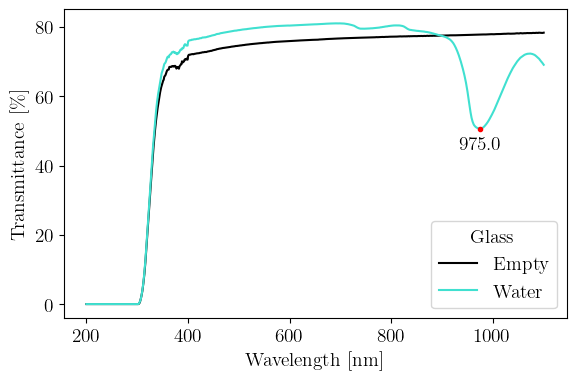

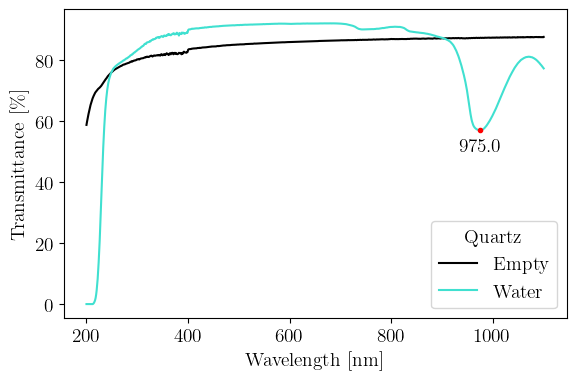

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 2')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

# Initialize the list of data for files with glass in the file
data_glass = []

# Initialize the list of data for files with quartz in the file
data_quartz = []

# Loop through the data
for file_name, file_data in data:
    # Check if the file name contains glass
    if 'glass' in file_name:
        # Append the file data to the data_glass list
        data_glass.append((file_name, file_data))
    
    # Check if the file name contains quartz
    if 'quartz' in file_name:
        # Append the file data to the data_quartz list
        data_quartz.append((file_name, file_data))

# Define colors for "Empty" and "Water"
color_empty = 'black'
color_water = 'turquoise'
color_default = 'gray'

# Function to find dips
def find_dips(y):
    # Invert the signal to find dips as peaks
    inverted_y = -np.array(y)
    peaks, _ = find_peaks(inverted_y, prominence=5)
    return peaks

# Plot the data for files with glass in the file name
fig, ax = plt.subplots(figsize=set_size(469))
for file_name, file_data in data_glass:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    label = base_name.split('_')[1]
    
    # Determine the color based on the file name
    if 'Empty' in file_name:
        color = color_empty
    elif 'Water' in file_name:
        color = color_water
        # Find dips
        dips = find_dips(y)
        # Annotate dips
        for dip in dips:
            ax.annotate(f'{x[dip]:.1f}', (x[dip], y[dip]), textcoords="offset points", xytext=(0,-15), ha='center')
    
    ax.plot(x, y, label=label, color=color)
ax.plot(np.array(x)[dips], np.array(y)[dips], '.', color='red') 

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Glass', loc='lower right')

plt.show()

# Plot the data for files with quartz in the file name
fig, ax = plt.subplots(figsize=set_size(469))
for file_name, file_data in data_quartz:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    label = base_name.split('_')[1]
    
    # Determine the color based on the file name
    if 'Empty' in file_name:
        color = color_empty
    elif 'Water' in file_name:
        color = color_water
        # Find dips
        dips = find_dips(y)
        # Annotate dips
        for dip in dips:
            ax.annotate(f'{x[dip]:.1f}', (x[dip], y[dip]), textcoords="offset points", xytext=(0,-15), ha='center')
    
    ax.plot(x, y, label=label, color=color)
ax.plot(np.array(x)[dips], np.array(y)[dips], '.', color='red')

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Quartz', loc='lower right')

plt.show()



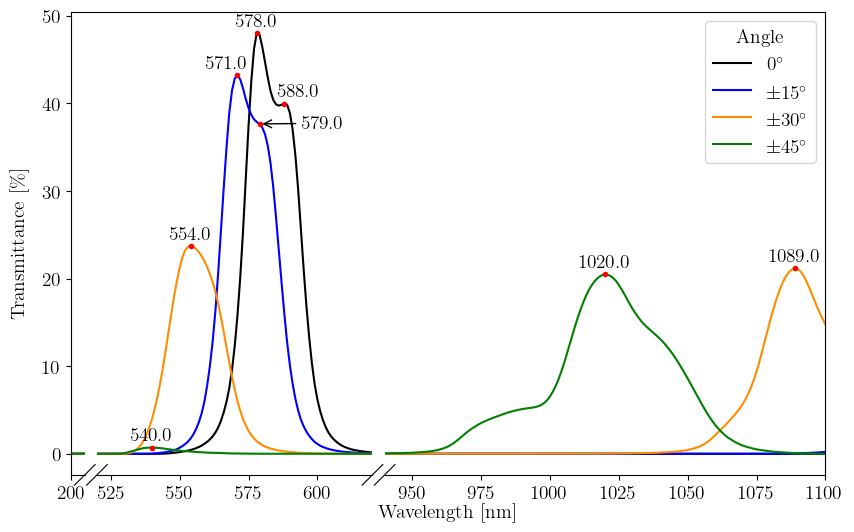

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os
from brokenaxes import brokenaxes
from scipy.signal import find_peaks

# Initialize the list of data for files with interference in the file
data_interference = []

# Loop through the data
for file_name, file_data in data:
    # Check if the file name contains interference
    if 'interference' in file_name:
        # Append the file data to the data_interference list
        data_interference.append((file_name, file_data))

# Plot the data for files with interference in the file name
fig = plt.figure(figsize=set_size(469*1.5))
bax = brokenaxes(xlims=((200, 205), (520, 620), (940, 1100)), hspace=0.05, wspace=0.05)

style_map = { 'interference_0': {'linestyle': '-', 'color': 'black'},
              'interference_15': {'linestyle': '-', 'color': 'blue'},
              'interference_30': {'linestyle': '-', 'color': 'darkorange'},
              'interference_45': {'linestyle': '-', 'color': 'green'}}

# Dictionary for annotation positions
annotation_positions = {
    'interference_0': {
        0: {'xytext': (10, 5)},
        1: {'xytext': (0, 5)},
    },
    'interference_15': {
        0: {'xytext': (-8, 5)},
    }
}

for file_name, file_data in data_interference:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]

    if 'interference_0' in file_name:
        label = base_name.split('_')[1] + r'$^{\circ}$'
    else:
        label = r'$\pm$' + base_name.split('_')[1] + r'$^{\circ}$'
    
    bax.plot(x, y, label=label, linestyle=style_map.get(base_name, {'linestyle': '-', 'color': 'black'})['linestyle'], color=style_map.get(base_name, {'linestyle': '-', 'color': 'black'})['color'])
    
    # Find peaks
    peaks, _ = find_peaks(y, prominence=0.1)
    
    # Annotate peaks
    for i, peak in enumerate(peaks):
        xytext = annotation_positions.get(base_name, {}).get(i, {'xytext': (0, 5)})['xytext']
        bax.annotate(f'{x[peak]:.1f}', (x[peak], y[peak]), textcoords="offset points", xytext=xytext, ha='center')
        bax.plot(x[peak], y[peak], '.', color='red') 

    # Manually add peak label at x=579nm for interference_15
    if 'interference_15' in file_name:
        index_579 = np.argmin(np.abs(np.array(x) - 579))
        xytext = annotation_positions.get('interference_15', {}).get(index_579, {'xytext': (30, -3)})['xytext']
        bax.annotate('579.0', (x[index_579], y[index_579]), textcoords="offset points", xytext=xytext, ha='left',
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
        bax.plot(x[index_579], y[index_579], '.', color='red')

bax.set_xlabel('Wavelength [nm]', labelpad=20)
bax.set_ylabel(r'Transmittance [$\%$]')
bax.legend(title='Angle', loc='upper right')
bax.big_ax.spines['right'].set_visible(True)
bax.big_ax.spines['top'].set_visible(True)


plt.show()


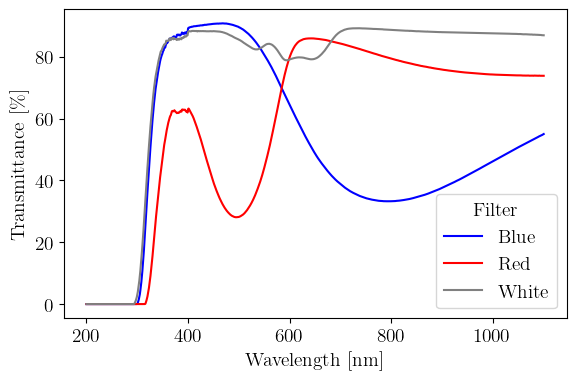

In [99]:
# Plot the data for blue.asc, red.asc and white.asc
fig, ax = plt.subplots(figsize=set_size(469))

# Define colors for each file
colors = {
    'Blue.asc': 'blue',
    'Red.asc': 'red',
    'White.asc': 'gray'
}

for file_name, file_data in data:
    if file_name in ['Blue.asc', 'Red.asc', 'White.asc']:
        x = [row[0] for row in file_data]
        y = [row[1] for row in file_data]
        ax.plot(x, y, label=file_name.split('.')[0], color=colors[file_name])

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Filter', loc='lower right')

plt.show()

## Task 3

Index: 14, Wavelength: 578.0
Index: 15, Wavelength: 575.0
Index: 16, Wavelength: 572.0
Index: 17, Wavelength: 569.0
Index: 18, Wavelength: 566.0
Index: 19, Wavelength: 563.0
Index: 20, Wavelength: 559.0
Index: 21, Wavelength: 557.0
Index: 23, Wavelength: 551.0
Index: 24, Wavelength: 548.0
Index: 27, Wavelength: 542.0
Index: 28, Wavelength: 539.0


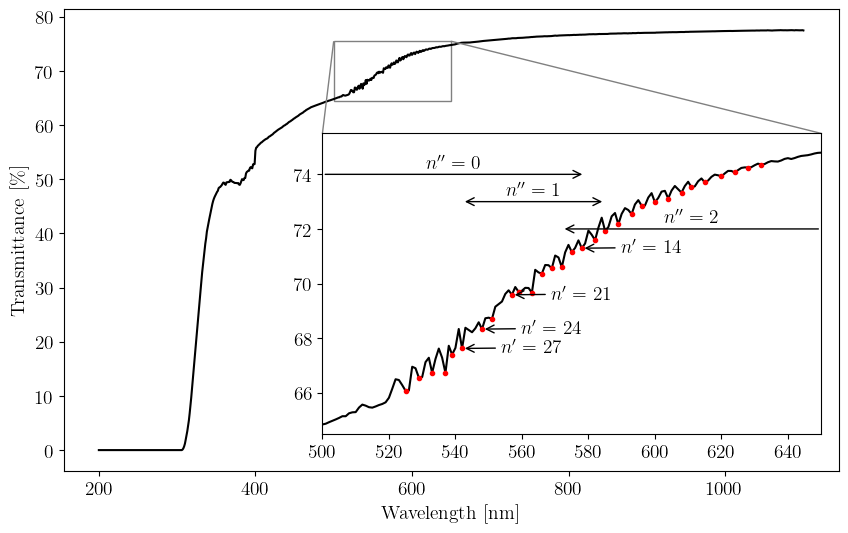

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 3')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

# plot inset axis around 500 to 700 nm
fig, ax = plt.subplots(figsize=(10, 6))
for file_name, file_data in data:
    if file_name == 'iodine.asc':
        x = [row[0] for row in file_data]
        y = [row[1] for row in file_data]
        ax.plot(x, y, label='Iodine', color='black')

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')

# Create inset of the zoomed region

wavelength_dict={578.06: 14, 574.91: 15, 571.54: 16, 568.48: 17, 565.43: 18, 562.48: 19, 559.6: 20, 556.75: 21, 554.08: 22, 551.43: 23, 548.87: 24, 546.37: 25, 543.78: 26, 541.47: 27, 539.19: 28}

lower_bound = 500
upper_bound = 650

ax_inset = inset_axes(ax, width="65%", height="65%", loc='lower right', bbox_to_anchor=(0,0.06,0.99,1) ,bbox_transform=ax.transAxes)
for file_name, file_data in data:
    if file_name == 'iodine.asc':
        x = [row[0] for row in file_data]
        y = [row[1] for row in file_data]
        ax_inset.plot(x, y, label='Iodine', color='black')
        
        # Filter data for the inset range
        inset_x = [val for val in x if lower_bound <= val <= upper_bound]
        inset_y = [y[x.index(val)] for val in inset_x]

        # Find peaks in the filtered data
        peaks, _ = find_peaks(-np.array(inset_y), prominence=0.002)

        # Delete peak 8
        peaks = np.delete(peaks, -8)
        peaks = np.delete(peaks, 0)
        peaks = np.delete(peaks, 0)
        peaks = np.delete(peaks, -1)

        # Annotate peaks and store them
        tolerance = 1  # Define a tolerance for matching wavelengths
        peak_info = []  # List to store peak information
        for peak in peaks:
            peak_wavelength = inset_x[peak]
            for wavelength, index in wavelength_dict.items():
                if abs(peak_wavelength - wavelength) <= tolerance:
                    if index in [14, 21, 24, 27]:  # Only show indices 14, 24, and 27
                        ax_inset.annotate(
                            f"$n'= $ {index}", 
                            (peak_wavelength, inset_y[peak]), 
                            textcoords="offset points", 
                            xytext=(50, -3), 
                            ha='center',
                            arrowprops=dict(arrowstyle="->")
                        )
                    peak_info.append((index, peak_wavelength))
            ax_inset.plot(peak_wavelength, inset_y[peak], '.', color='red')


# Annotate the n'' values
ax_inset.annotate(
    '', 
    xy=(579, 74), 
    xytext=(lower_bound, 74),
    arrowprops=dict(arrowstyle='->', lw=1)
)
ax_inset.text((lower_bound+579)/2, 74.1, "$n''=0$", ha='center', va='bottom')

ax_inset.annotate(
    '', 
    xy=(542, 73), 
    xytext=(585, 73),
    arrowprops=dict(arrowstyle='<->', lw=1)
)
ax_inset.text((542+585)/2, 73.1, "$n''=1$", ha='center', va='bottom')

ax_inset.annotate(
    '', 
    xytext=(572, 72), 
    xy=(upper_bound, 72),
    arrowprops=dict(arrowstyle='<-', lw=1)
)
ax_inset.text((572+upper_bound)/2, 72.1, "$n''=2$", ha='center', va='bottom')

# Print the peak information
for index, wavelength in peak_info:
    print(f'Index: {index}, Wavelength: {wavelength}')

ax_inset.set_xlim(lower_bound, upper_bound)
ax_inset.set_ylim(64.5, 75.5)

# Add lines connecting the inset to the main plot
mark_inset(ax, ax_inset, loc1=1, loc2=2, fc="none", ec="0.5")

plt.show()

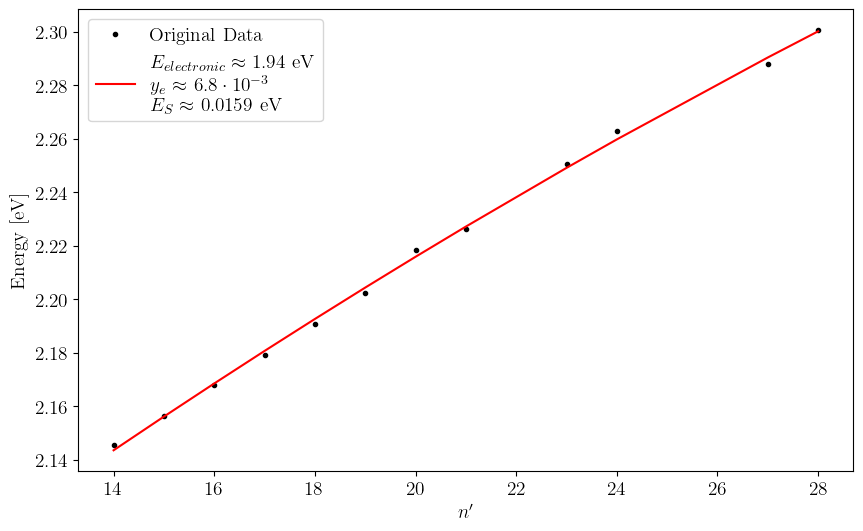

E = 1.9363943920377773 ± 0.014914106586426836, w = 0.01585497366659239 ± 0.0014284383403513454, y_e = 0.00684537064787844 ± 0.0014713803412335711
n_e = 72.04 ± 15.70
E_K = 2.52 ± 0.28 eV
E'_D = 0.58 ± 0.28 eV
E''_D = 1.58 ± 0.28 eV


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from decimal import Decimal

# Constants
h = 6.626e-34
c = 299792458
e = 1.602e-19

# Assuming peak_info is already defined from the previous cell
# peak_info contains tuples of (index, wavelength)

# Extract indices and wavelengths from peak_info
indices = [index for index, wavelength in peak_info]
wavelengths = [wavelength for index, wavelength in peak_info]

# Convert peak_wavelengths to energy in eV
peak_energies = [h * c * 1e9 / (e * peak) for peak in wavelengths]

# Define the function to fit
def fit_function(x, E_electron, w, y_e):
    return E_electron + w * ((x + 0.5) - y_e * (x + 0.5)**2)

# Extract the x and y data from peak_info
x_data = np.array(indices)
y_data = np.array(peak_energies)

# Use curve_fit to find the optimal parameters
popt, pcov = curve_fit(fit_function, x_data, y_data)

# Extract the optimal parameters
E_electron_opt, w_opt, y_e_opt = popt

# Calculate the uncertainties (standard deviations)
perr = np.sqrt(np.diag(pcov))
E_electron_err, w_err, y_e_err = perr

# Generate fitted y data
y_fit = fit_function(x_data, *popt)

# Print the optimal parameters and their uncertainties
def format_scientific_notation(value, precision=2):
    if precision == 0:
        d = Decimal(value).scaleb(-Decimal(value).adjusted()).quantize(Decimal('1'))
        sign, digits, exponent = d.as_tuple()
        digits = ''.join(map(str, digits))
        if sign:
            digits = '-' + digits
        return f"{digits} \cdot 10^{{{Decimal(value).adjusted()}}}"
    else:
        d = Decimal(value).scaleb(-Decimal(value).adjusted()).quantize(Decimal(f'1e-{precision}'))
        sign, digits, exponent = d.as_tuple()
        digits = ''.join(map(str, digits))
        if sign:
            digits = '-' + digits
        return f"{digits[0]}.{digits[1:]} \cdot 10^{{{Decimal(value).adjusted()}}}"

# Plot the original data and the fitted function
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_data, y_data, '.', color='black', label='Original Data')
ax.plot(x_data, y_fit, '-', color='red', label=r'$E_{electronic} \approx$' + f' ${E_electron_opt:.2f}$ eV \n $y_e$ ' +r'$\approx$'  f' ${format_scientific_notation(y_e_opt, precision=1)} $ \n' + r"$E_S \approx$" + f' ${w_opt:.4f}$ eV')
ax.set_xlabel(f"$n'$")
ax.set_ylabel('Energy [eV]')
ax.legend()
plt.show()

print(f"E = {E_electron_opt} ± {E_electron_err}, w = {w_opt} ± {w_err}, y_e = {y_e_opt} ± {y_e_err}")

n_e = 1/(2*y_e_opt) - 1
n_e_err = y_e_err/(2*y_e_opt**2)
E_K = E_electron_opt + w_opt*(n_e + 0.5) - w_opt*y_e_opt*(n_e + 0.5)**2
E_K_err = np.sqrt(E_electron_err**2 + (w_opt*n_e_err)**2 + (w_opt*y_e_err*(n_e + 0.5)**2)**2)
E_prime_D = E_K - E_electron_opt
E_prime_D_err = np.sqrt(E_K_err**2 + E_electron_err**2)
E_double_prime_D = E_K - 0.94
E_double_prime_D_err = E_K_err

print(f"n_e = {n_e:.2f} ± {n_e_err:.2f}")
print(f"E_K = {E_K:.2f} ± {E_K_err:.2f} eV")
print(f"E'_D = {E_prime_D:.2f} ± {E_prime_D_err:.2f} eV")
print(f"E''_D = {E_double_prime_D:.2f} ± {E_double_prime_D_err:.2f} eV")




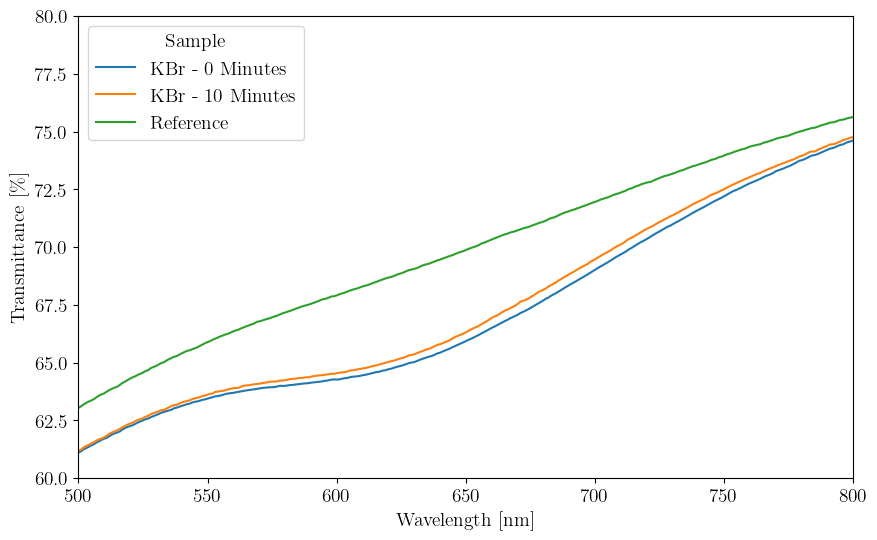

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 4')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

# plot all files with kbr in the name

fig, ax = plt.subplots(figsize=(10, 6))
for file_name, file_data in data:
    if 'KBr20' in file_name:
        label = 'Reference'
    elif 'KBr10' in file_name:
        label = 'KBr - 10 Minutes'
    elif 'KBr' in file_name:
        label = 'KBr - 0 Minutes'
    else:
        continue

    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    ax.plot(x, y, label=label)

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Sample', loc='upper left')
ax.set_xlim(500, 800)
ax.set_ylim(60, 80)
plt.show()

Integral of KBr - KBr20 from 11000 to 20000 cm⁻¹: 360.78354906342037
Integral of KBr10 - KBr20 from 11000 to 20000 cm⁻¹: 323.1109392183512
N KBr 0: 645458864512875.9
N KBr 10: 578060780434600.6
Result: 5.589566878684077e-15


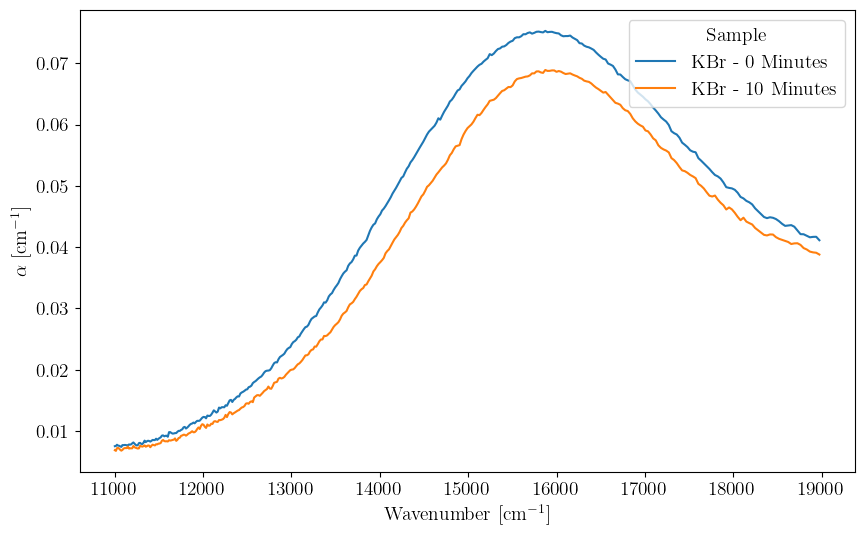

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Subtract KBr20 from KBr and KBr10
kbr_subtracted = []
kbr10_subtracted = []
d = 0.8

for (kbr_row, kbr10_row, kbr20_row) in zip(kbr_data, kbr10_data, kbr20_data):
    kbr_subtracted.append([1e7 * (1 / kbr_row[0]), -np.log(( kbr_row[1]) / kbr20_row[1]) / d])
    kbr10_subtracted.append([1e7 * (1 / kbr10_row[0]), -np.log(( kbr10_row[1]) / kbr20_row[1]) / d])

# Filter data within the integration range
integration_range = (11000, 19000)
kbr_filtered = [row for row in kbr_subtracted if integration_range[0] <= row[0] <= integration_range[1]]
kbr10_filtered = [row for row in kbr10_subtracted if integration_range[0] <= row[0] <= integration_range[1]]

# Extract x and y values for integration
x_kbr = [row[0] for row in kbr_filtered]
y_kbr = [row[1] for row in kbr_filtered]

x_kbr10 = [row[0] for row in kbr10_filtered]
y_kbr10 = [row[1] for row in kbr10_filtered]

# Perform integration
integral_kbr = np.trapz(y_kbr, x_kbr)
integral_kbr10 = np.trapz(y_kbr10, x_kbr10)

e= 1.602e-19
c= 299792458
epsilon_0= 8.854187817e-12
n=1.559
mass= 9.10938356e-31
result = (e**2) / (4 * c**2 * epsilon_0 * mass * n) * (n**2+2)*2/9

print(f"Integral of KBr - KBr20 from 11000 to 20000 cm⁻¹: {integral_kbr}")
print(f"Integral of KBr10 - KBr20 from 11000 to 20000 cm⁻¹: {integral_kbr10}")
print(f"N KBr 0: {integral_kbr/(result*100)}")
print(f"N KBr 10: {integral_kbr10/(result*100)}")
print(f"Result: {result}")


# Plot the subtracted data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_kbr, y_kbr, label='KBr - 0 Minutes')
ax.plot(x_kbr10, y_kbr10, label='KBr - 10 Minutes')

ax.set_xlabel('Wavenumber [cm$^{-1}$]')
ax.set_ylabel('$\\alpha$ [cm$^{-1}$]')
ax.legend(title='Sample', loc='upper right')


plt.show()